 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [368]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import os

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [369]:
# Reading whale returns
whale_returns = pd.read_csv( # Read Whale Data from csv file
    ".\Resources\whale_returns.csv", #File Path
    parse_dates=True, infer_datetime_format=True, index_col="Date" #Format the Dates and set as index
)

In [370]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [371]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
#whale_returns

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [372]:
# Reading algorithmic returns
algo_returns = pd.read_csv( # Read Algo Data from csv file
    "./Resources/algo_returns.csv", #File Path
    parse_dates=True, infer_datetime_format=True, index_col="Date" #Format the Dates and set as index
)

In [373]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [374]:
# Drop nulls
algo_returns = algo_returns.dropna().copy() # Overwriting, best practice to use .copy()
#algo_returns

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [375]:
# Reading S&P 500 Closing Prices
sp_ticker = pd.read_csv( # Read Whale Data from csv file
    ".\Resources\sp500_history.csv", #File Path
    parse_dates=True, infer_datetime_format=True, index_col="Date" #Format the Dates and set as index
)

In [376]:
# Check Data Types
sp_ticker.dtypes

Close    object
dtype: object

In [377]:
# Rename `Close` Column to be specific to this portfolio.
sp_ticker = sp_ticker.rename(columns={"Close":"S&P"}).copy() # Moved up so both ticker and returns have good column name

In [378]:
# Fix Data Types
sp_ticker["S&P"] = sp_ticker["S&P"].str.replace("$","",regex=False).astype("float")

In [379]:
# Calculate Daily Returns
sp_returns = sp_ticker.pct_change()

In [380]:
# Drop nulls
sp_returns = sp_returns.dropna().copy()

## Combine Whale, Algorithmic, and S&P 500 Returns

In [381]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns,algo_returns,sp_returns], axis='columns', join='inner')
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

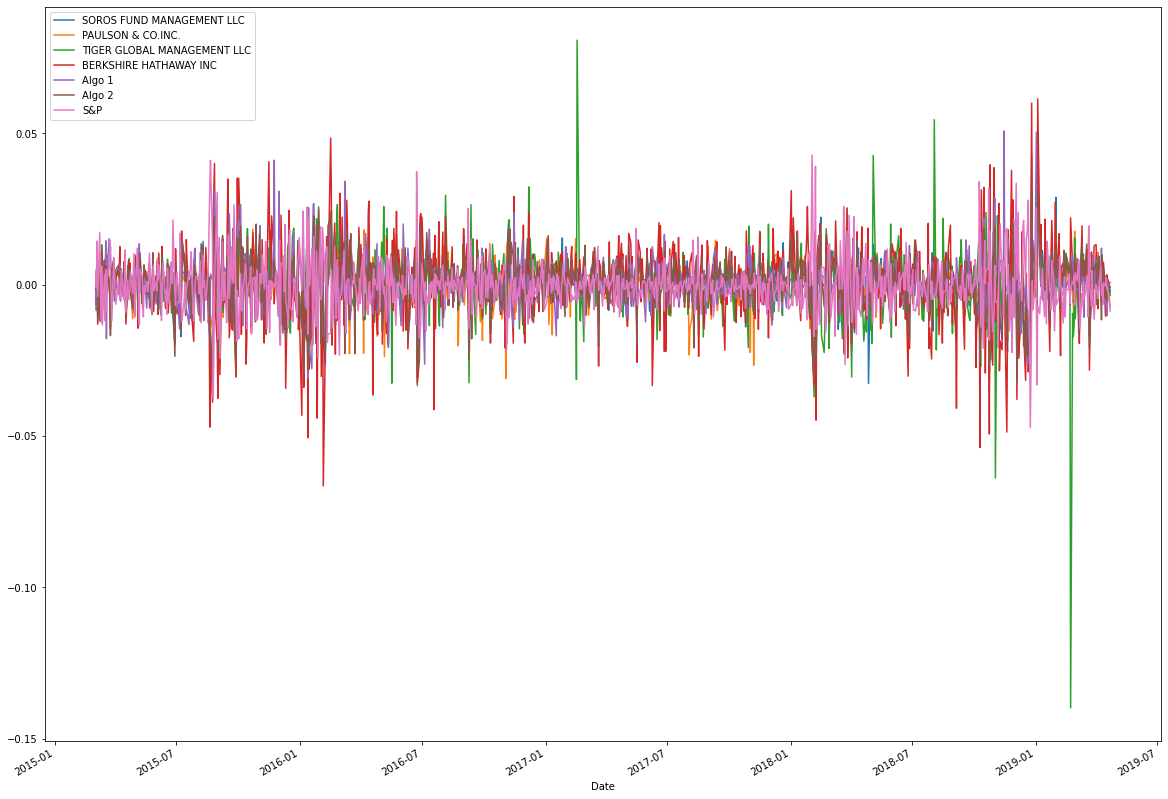

In [382]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(20,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

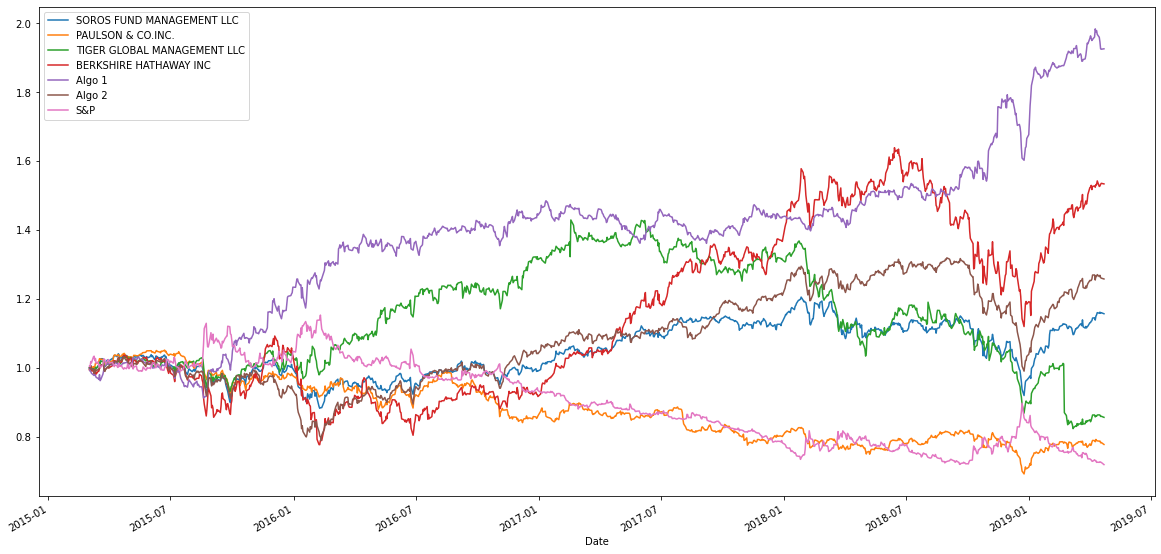

In [383]:
# Calculate cumulative returns of all portfolios
cumu_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumu_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

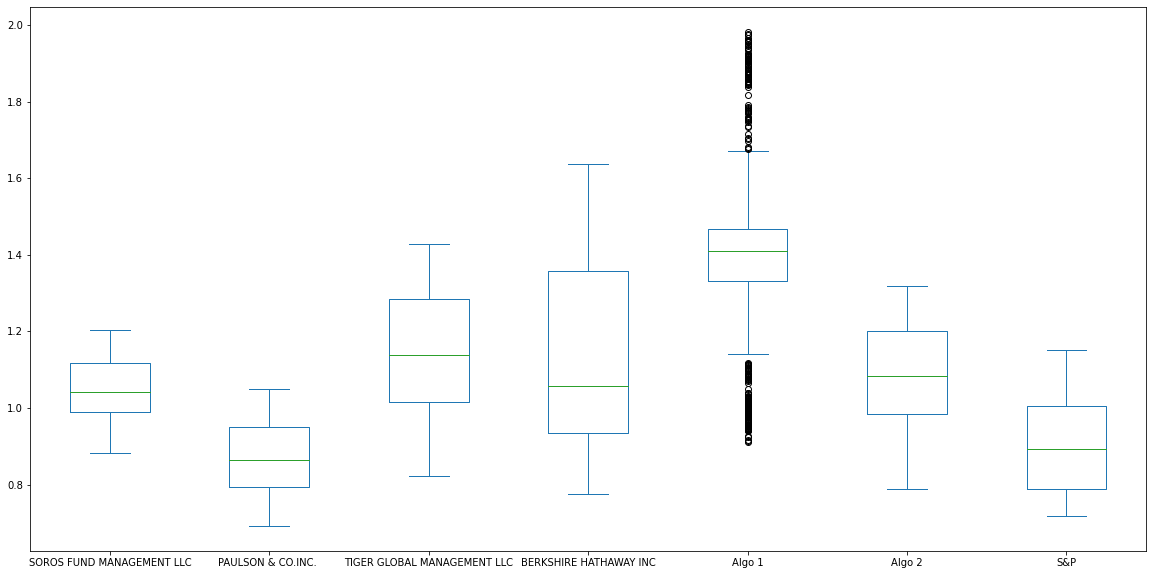

In [384]:
# Box plot to visually show risk
cumu_returns.plot(kind="box",figsize=(20,10))

### Calculate Standard Deviations

In [385]:
# Calculate the daily standard deviations of all portfolios
std_returns = cumu_returns.std()

### Determine which portfolios are riskier than the S&P 500

In [408]:
# Calculate  the daily standard deviation of S&P 500
sp_std = std_returns["S&P"]
# Determine which portfolios are riskier than the S&P 500
print("--------Riskier than S&P500?--------")
print(std_returns.drop("S&P")>sp_std)

--------Riskier than S&P500?--------
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
dtype: bool


### Calculate the Annualized Standard Deviation

In [387]:
# Calculate the annualized standard deviation (252 trading days)
annual_std_returns = std_returns * np.sqrt(252)
#annual_std_returns

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

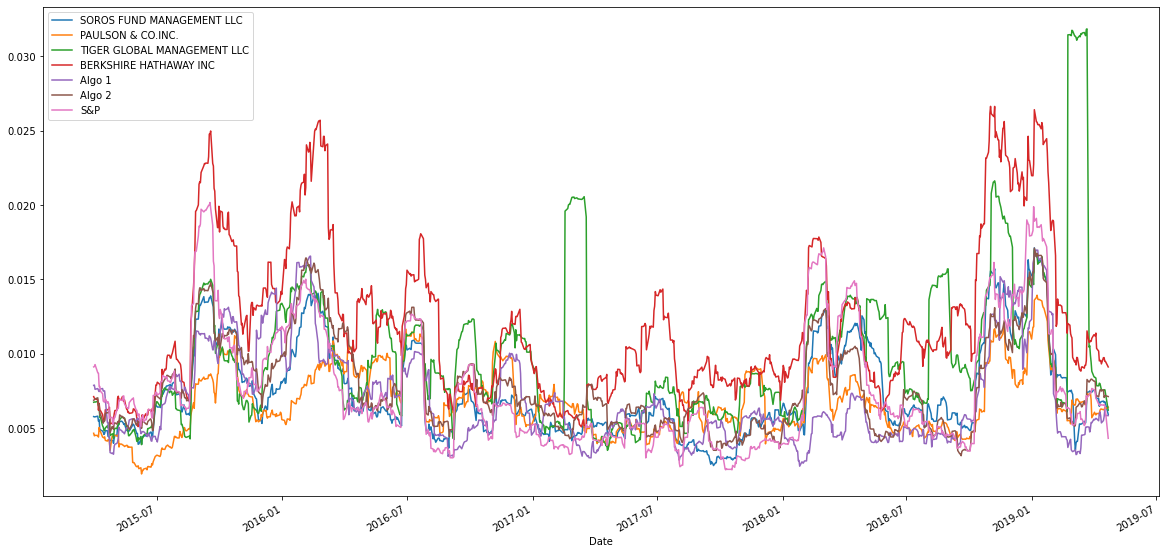

In [388]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
std_returns_21 = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
std_returns_21.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

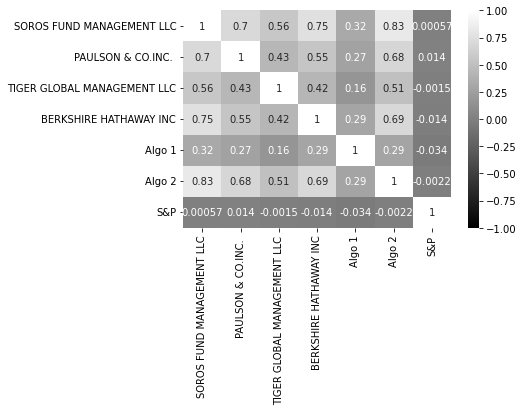

In [389]:
# Calculate the correlation
corr_returns = combined_returns.corr()
# Display the correlation matrix
sns.heatmap(corr_returns, vmin=-1, vmax=1, annot=True, cmap="gray")

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

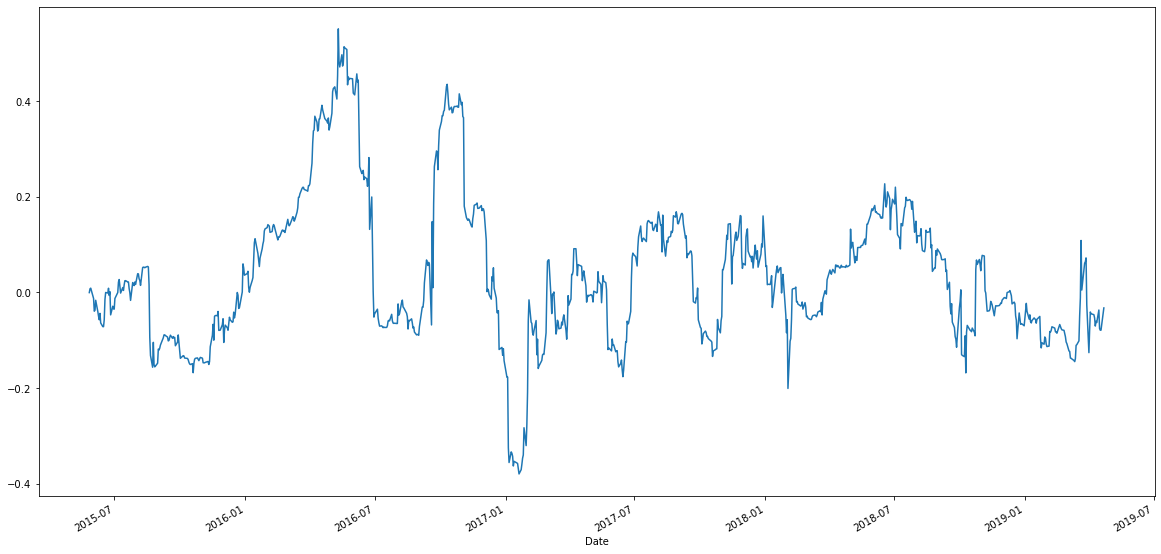

In [390]:
# Calculate covariance of a single portfolio #instructions specify to use rolling 60
PAULSON_covar = combined_returns["PAULSON & CO.INC. "].rolling(window=60).cov(combined_returns["S&P"])
# Calculate variance of S&P 500
sp_var = combined_returns["S&P"].rolling(window=60).var()
# Computing beta
PAULSON_beta = PAULSON_covar / sp_var
# Plot beta trend
PAULSON_beta.dropna().plot(figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [391]:
# Use `ewm` to calculate the rolling window
ewm_returns = combined_returns.ewm(span=21).std().dropna()
ewm_returns.tail(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P
Date,,,,,,,
2019-04-08,0.006105,0.006496,0.012633,0.009479,0.004943,0.006505,0.006364
2019-04-09,0.006209,0.006407,0.012259,0.009153,0.005629,0.007414,0.006101
2019-04-10,0.006462,0.006517,0.011710,0.008781,0.005722,0.007523,0.005833
2019-04-11,0.006179,0.006408,0.011173,0.008412,0.005456,0.007237,0.005769
2019-04-12,0.005992,0.006140,0.010706,0.008171,0.005639,0.006961,0.005548
2019-04-15,0.005817,0.005879,0.010209,0.008680,0.005619,0.006887,0.005300
2019-04-16,0.005551,0.005606,0.009747,0.008278,0.005812,0.006588,0.005175
2019-04-17,0.005487,0.005727,0.009415,0.007913,0.006320,0.006566,0.004936
2019-04-18,0.005232,0.005475,0.008978,0.007546,0.006027,0.006286,0.004707


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [392]:
#Import & calculate Risk Free Rate from CSV using 90 Day Treasury Bill
tBill = pd.read_csv(".\Resources\OMRXTBILL90_data.csv", #File Path
    parse_dates=True, infer_datetime_format=True, index_col="Date" #Format the Dates and set as index
)

#Calculate Risk Free Rate
risk_free_rate = tBill.pct_change().dropna() # Calculate risk free rate and remove NaN

#Adding risk free rate to combined returns (creates better math visuals in Sharpe Ratio equation)
portfolios = pd.concat([combined_returns,risk_free_rate], axis='columns', join='inner')

# Annualized Sharpe Ratios
combined_sharpes = ((portfolios.mean()-portfolios['OMRXTBILL90'].mean())*252)/(portfolios.std() * np.sqrt(252))
combined_sharpes

SOROS FUND MANAGEMENT LLC      0.402285
PAULSON & CO.INC.             -0.371736
TIGER GLOBAL MANAGEMENT LLC   -0.042355
BERKSHIRE HATHAWAY INC         0.616925
Algo 1                         1.434332
Algo 2                         0.566677
S&P                           -0.508079
OMRXTBILL90                    0.000000
dtype: float64

<AxesSubplot:>

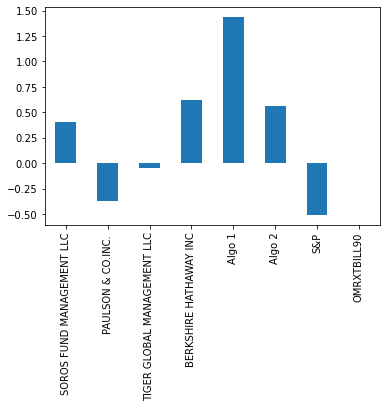

In [393]:
# Visualize the sharpe ratios as a bar plot
combined_sharpes.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Assuming the adjusted close data provided in OMRXTBILL90 (downloaded by Google Sheet's GoogleFinance function) is a representitive 90 Day Treasury Bond and that is a good representation of a risk free rate. The Algorithmic strategy presented in Algo 1 far out performs the other porfolios. Based on these whale's presented data, in this time rate, the Algo 2 sharpe ratio is at least comparable to the best whale strategy.

Overall as none of these sharpe ratios are above 2 it is a fair bet that there are likely other strategies/investments that can be made to out perform all presented strategies in this time frame. It may be worth an investor's time to search for better options.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [394]:
# Reading all csv data from PopStocks (containing 5 popular stocks) resource folder
custom_stocks_import = []
filepath_str = "./Resources/PopStocks"
indexCol = "Date"

for filename in os.listdir(filepath_str): # Loops over ever file name in the folder
    df = pd.read_csv( # Uses Pandas csv reader
        f"{filepath_str}/{filename}", # Recreates the  direct path to the csv file
        
        # Parse and set the date index
        parse_dates=True,
        infer_datetime_format=True,
        index_col=indexCol
        )
    custom_stocks_import.append(df) # Appends the dataframe to the array of dataframes

In [395]:
# Combine all stocks in a single DataFrame
custom_stocks_tickers = pd.concat(custom_stocks_import, axis="columns", join="inner") # Passes in the array to be concat'ed into a single portfolio
# Please note that I downloaded multiple tickers at once and then separated the csv, this means I do not need to change the column headers

In [396]:
# Calculate daily returns
Custom_Daily_returns = custom_stocks_tickers.pct_change()
# Drop NAs
Custom_Daily_returns.dropna()
# Display sample data
Custom_Daily_returns.head(10)

,BBBY,CMG,FIVE,HUSA,TRIP
Date,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN
2015-03-04,-0.006414,-0.006388,-0.014327,0.000000,-0.013596
2015-03-05,0.000403,0.009531,-0.033915,-0.026616,-0.014119
2015-03-06,-0.009813,-0.017614,-0.027081,0.125000,-0.025915
2015-03-09,0.015884,0.002520,-0.007560,-0.045139,0.003617
2015-03-10,-0.011493,-0.008480,-0.010388,-0.083636,-0.021393
2015-03-11,-0.001082,0.009210,0.013996,-0.007937,-0.011287
2015-03-12,0.014616,0.014559,0.059006,0.100000,0.011175
2015-03-13,0.001067,0.006146,0.013034,-0.043636,-0.019370


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

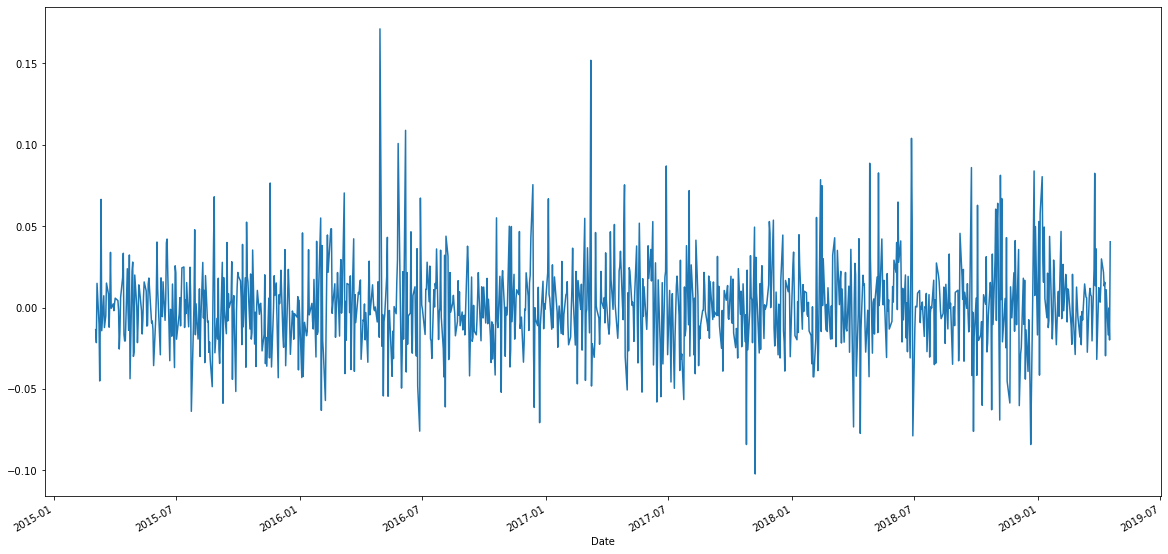

In [397]:
# Set weights
weights = [1/3, 1/3, 1/3, 1/3, 1/3]

# Calculate portfolio return
Custom_Portfolio_returns = Custom_Daily_returns.dot(weights).dropna()

# Display sample data
Custom_Portfolio_returns.plot(figsize = (20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [398]:
# Join your returns DataFrame to the original returns DataFrame
Portfolio_project_returns = pd.concat([combined_returns, Custom_Portfolio_returns], axis='columns', join='inner')
Portfolio_project_returns.rename(columns={0:"CustomFolio"},inplace=True)
Portfolio_project_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P,CustomFolio
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.013575
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.021572
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.014859
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.010226
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.045130


In [399]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Portfolio_project_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [400]:
# Calculate the annualized `std`
stock_project_std = Portfolio_project_returns.std()

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

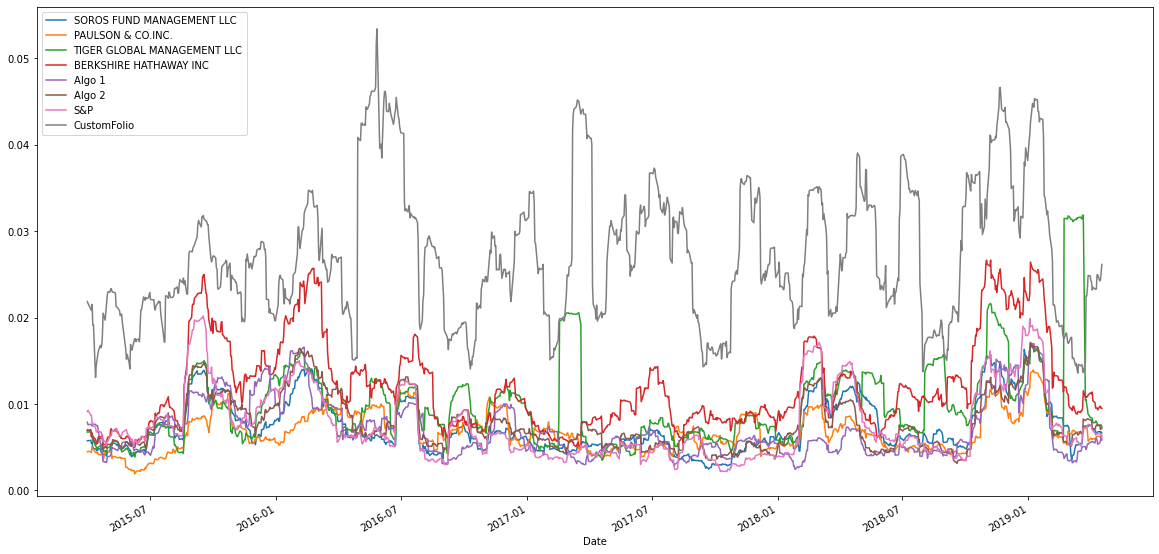

In [401]:
# Calculate rolling standard deviation
stock_project_std21 = Portfolio_project_returns.rolling(window=21).std()
# Plot rolling standard deviation
stock_project_std21.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

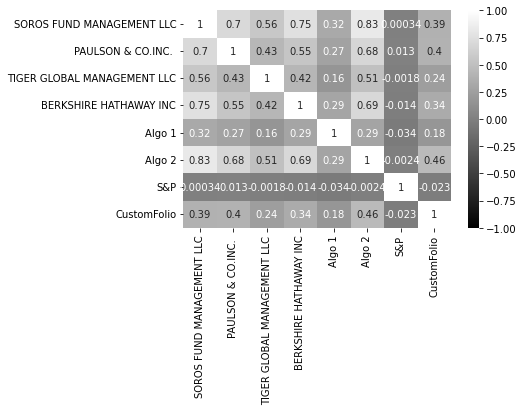

In [402]:
# Calculate and plot the correlation
stock_project_corr = Portfolio_project_returns.corr()
sns.heatmap(stock_project_corr, vmin=-1, vmax=1, annot=True, cmap="gray")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

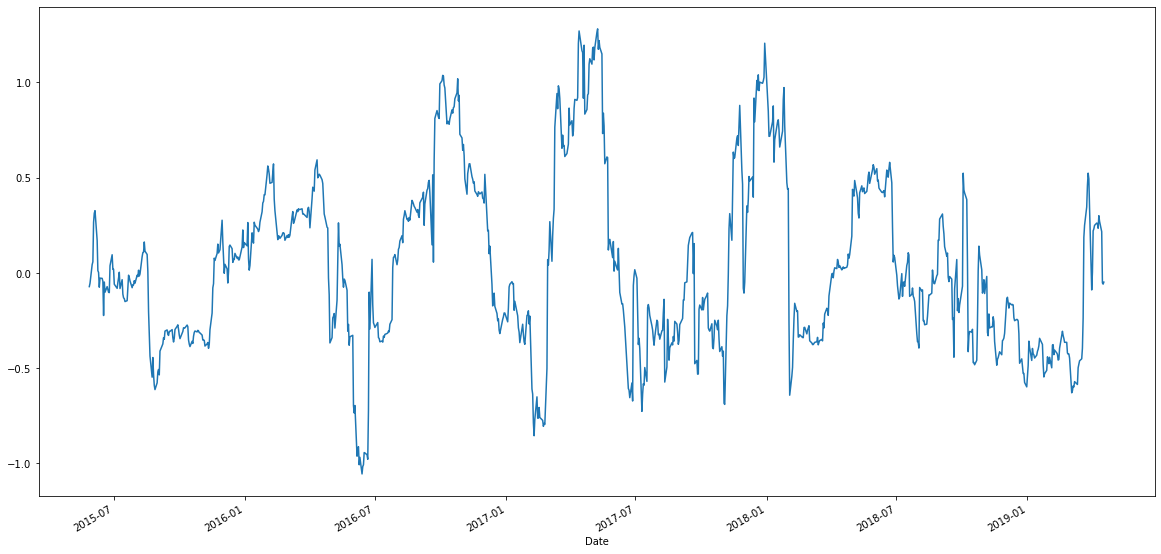

In [403]:
# Calculate and plot Beta
sp_covar = Portfolio_project_returns["CustomFolio"].rolling(window=60).cov(Portfolio_project_returns["S&P"])

# Could reuse sp_var (S&P Variance) from previous cell but am recalculating it in case dates inner join changes things
sp_var = Portfolio_project_returns["S&P"].rolling(window=60).var()

# Computing beta
Portfolio_beta = sp_covar / sp_var

# Plot beta trend
Portfolio_beta.dropna().plot(figsize = (20,10))


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [404]:
# Calculate Annualized Sharpe Ratios
    # reusing Risk free rate from previous cell
sharpe_folio = pd.concat([Portfolio_project_returns,risk_free_rate], axis='columns', join='inner')
sharpe_ratios = ((sharpe_folio.mean()-sharpe_folio['OMRXTBILL90'].mean())*252)/(sharpe_folio.std() * np.sqrt(252))
sharpe_ratios.sort_values() # Print a 'ranking' of Sharpe values

S&P                           -0.508079
PAULSON & CO.INC.             -0.371736
TIGER GLOBAL MANAGEMENT LLC   -0.042355
OMRXTBILL90                    0.000000
SOROS FUND MANAGEMENT LLC      0.402285
CustomFolio                    0.478509
Algo 2                         0.566677
BERKSHIRE HATHAWAY INC         0.616925
Algo 1                         1.434332
dtype: float64

<AxesSubplot:>

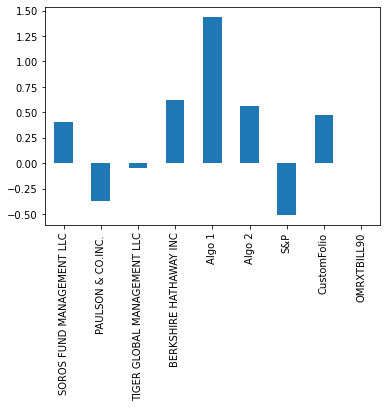

In [405]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

### How does your portfolio do?

Surprisingly the portfolio is almost competetive with the other portfolio's Sharpe Ratio. Obviously my standard deviation shows my portfolio contains a lot of risk. My portfolio choices where not well tuned. I essentially grabbed stocks randomly from different sectors.

Despite the portfolio getting a reasonably high Sharpe Ratio - Looking at the cumulative product I was expereincing loss for the majority of the time frame and only became positive near the end of the period. As such:
* It is likely better if I either changed my weights based on the risk of each stocks
* I could also invest in more stocks across other sectors or within my current sectors to an effort to further reduce idiosyncratic risk

<AxesSubplot:xlabel='Date'>

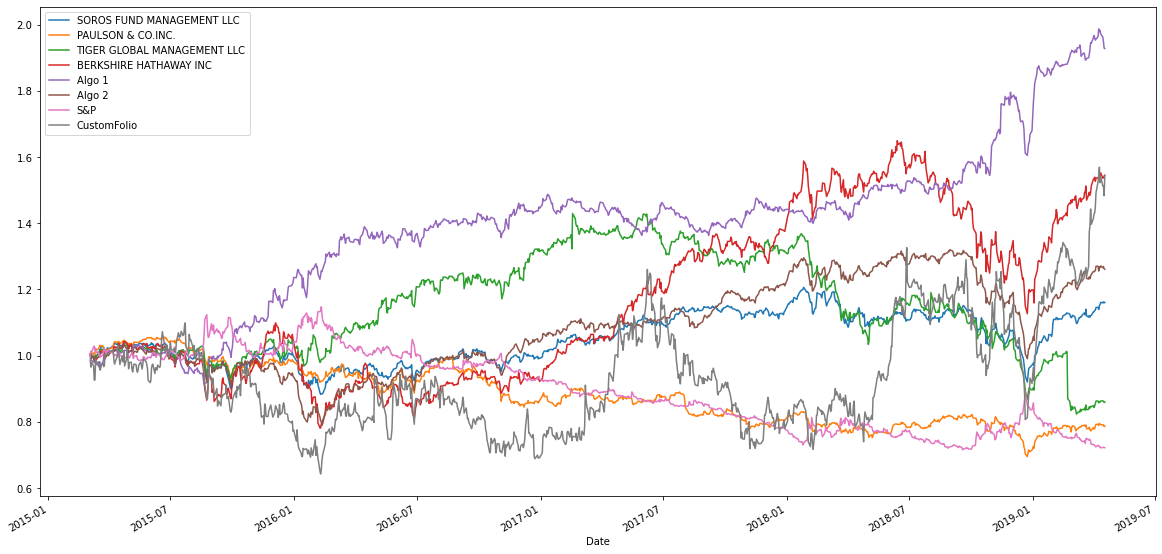

In [406]:
(1+Portfolio_project_returns).cumprod().plot(figsize = (20,10))